In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import library
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Data/suv_data.csv') 

In [10]:
df.info() #display the dataframe info ~ variables names (humid, humid90, ...Ymax) count of rows that are are non-null, and the datatype (Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df.shape

(400, 5)

In [13]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


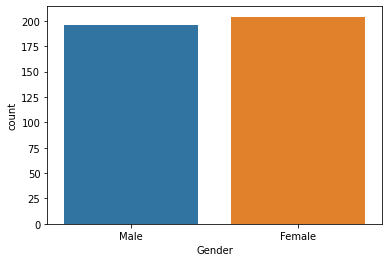

In [14]:
sns.countplot(df['Gender'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


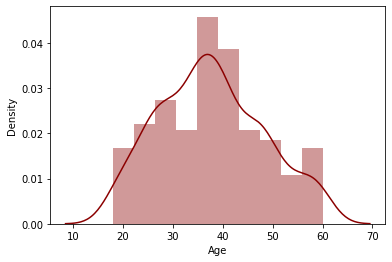

In [17]:
sns.distplot(df['Age'],color='darkred',kde=True)

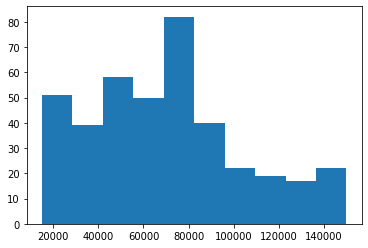

In [18]:
plt.hist(df['EstimatedSalary'])
plt.show()

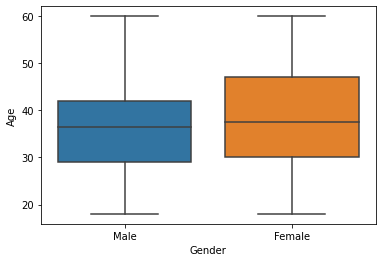

In [19]:
sns.boxplot(x='Gender',y='Age',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


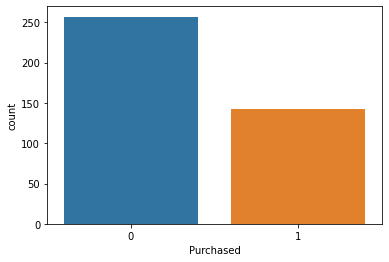

In [20]:
sns.countplot('Purchased',data=df)

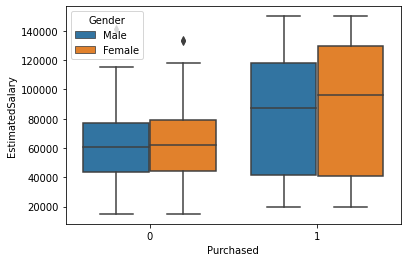

In [21]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=df,hue='Gender')

In [32]:
# indepedent var. array
x = df.drop(columns="Purchased") 
print(x) 

      User ID  Gender  Age  EstimatedSalary
0    15624510    Male   19            19000
1    15810944    Male   35            20000
2    15668575  Female   26            43000
3    15603246  Female   27            57000
4    15804002    Male   19            76000
..        ...     ...  ...              ...
395  15691863  Female   46            41000
396  15706071    Male   51            23000
397  15654296  Female   50            20000
398  15755018    Male   36            33000
399  15594041  Female   49            36000

[400 rows x 4 columns]


In [33]:
x = pd.get_dummies(x, columns = ['Gender'])

In [34]:
print(x)

      User ID  Age  EstimatedSalary  Gender_Female  Gender_Male
0    15624510   19            19000              0            1
1    15810944   35            20000              0            1
2    15668575   26            43000              1            0
3    15603246   27            57000              1            0
4    15804002   19            76000              0            1
..        ...  ...              ...            ...          ...
395  15691863   46            41000              1            0
396  15706071   51            23000              0            1
397  15654296   50            20000              1            0
398  15755018   36            33000              0            1
399  15594041   49            36000              1            0

[400 rows x 5 columns]


In [39]:
X=x.loc[:,['Age','EstimatedSalary','Gender_Female', 'Gender_Male']].values
y=df.loc[:,'Purchased'].values

In [40]:
print(x)

      User ID  Age  EstimatedSalary  Gender_Female  Gender_Male
0    15624510   19            19000              0            1
1    15810944   35            20000              0            1
2    15668575   26            43000              1            0
3    15603246   27            57000              1            0
4    15804002   19            76000              0            1
..        ...  ...              ...            ...          ...
395  15691863   46            41000              1            0
396  15706071   51            23000              0            1
397  15654296   50            20000              1            0
398  15755018   36            33000              0            1
399  15594041   49            36000              1            0

[400 rows x 5 columns]


In [41]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [50]:
model=sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.344690
         Iterations 7


In [51]:
from statsmodels.base.model import Results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                  0.4713
Time:                        00:18:04   Log-Likelihood:                -137.88
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.174e-52
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
User ID         -6.492e-07   2.15e-06     -0.301      0.763   -4.87e-06    3.57e-06
Age                 0.2370      0.026      8.982      0.000       0.185       0.289
EstimatedSalary  3.652e-05   5.48e-06      6.663      0.000    2.58e-05    4.73e-05
Gender_Female      -2.5990     33.800     -0.077      0.939     -68.846      63.648
Gender_Male        -2.2773     33.758     -0.067      0.946     -68.442      63.888
===================================================================================
"""

In [52]:
np.exp(model.params)

User ID            0.999999
Age                1.267472
EstimatedSalary    1.000037
Gender_Female      0.074349
Gender_Male        0.102565
dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [56]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [57]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.91

In [58]:
accuracy_score(y_test,y_pred)*100

91.0